# In this notebook we have performed basic preprcosessing using NLTK and TextBlob like
1. tokenizer
2. lowercase tokens
3. spelling correction error using TEXTBLOB
4. remove stopwords
5. remove punctuataion
6. remove that are not alphabet
7. remove token that are of length 1
* we can include POS and lemmatization etc..

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import pickle
%matplotlib inline

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# necessary imports for preprocessing

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import re
punct = set(string.punctuation)
stopWords = set(stopwords.words('english'))

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.CSV")

In [4]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [36]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],inplace=True)

In [6]:
df.head()

,Review Text,Rating,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1


In [39]:
'''
def text_len(txt):
    txt = "".join(txt.split())
    return len(txt)

df["length"] = df["Review Text"].apply(lambda x : text_len(x))  
df.info()
'''

'\ndef text_len(txt):\n    txt = "".join(txt.split())\n    return len(txt)\n\ndf["length"] = df["Review Text"].apply(lambda x : text_len(x))  \ndf.info()\n'

In [7]:
df.dropna(axis=0,inplace=True)# removing NaN rows

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 3 columns):
Review Text        22641 non-null object
Rating             22641 non-null int64
Recommended IND    22641 non-null int64
dtypes: int64(2), object(1)
memory usage: 707.5+ KB


In [9]:
df.drop_duplicates(subset=["Review Text"],keep="first").tail()

,Review Text,Rating,Recommended IND
23481,I was very happy to snag this dress at such a ...,5,1
23482,"It reminds me of maternity clothes. soft, stre...",3,1
23483,"This fit well, but the top was very see throug...",3,0
23484,I bought this dress for a wedding i have this ...,3,1
23485,This dress in a lovely platinum is feminine an...,5,1


#               MAIN STEPS ===========================

# Before

In [11]:
df["Review Text"].iloc[6]

'I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.'

# spelling mistakes handling TEXTBLOB
* since would help reduce unnecessary vocab size 

# After

In [13]:
from textblob import TextBlob
b = TextBlob(df["Review Text"].iloc[6])
print(b.correct())

I added this in my basket at the last minute to see what it would look like in person. (store pick up). i went with the darker color only because i am so pale :-) the color is really gorgeous, and turns out it matched everything i was trying on with it perfectly. it is a little baggy on me and the is is the mallet size (summer, no petite). i decided to keep it though, because as i said, it matted everything. my jeans, parts, and the 3 skirts i was trying on (of which i ]kept all ) loops.


In [14]:
n = 0
def correct_spelling_errors(sentence):
    global n
    n = n + 1
    if (n % 1000 == 0):
        print(n)          
    b = TextBlob(sentence)
    return b.correct()

In [15]:
import time
start = time.clock()
%%time
df["Review Text"] = df["Review Text"].apply( lambda x : ''.join(correct_spelling_errors(x)) )
print("Total duration: ", time.clock() - start)    
#df["Review Text"].iloc[6]

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
Total duration:  4953.228786456


c:\users\me\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


# above func Took about 1 hr 37 minutes compute time 
* saving info as correct_spelling pickle (Trade Off Precision VS Accuracy)

In [18]:
df["Review Text"].iloc[6]
pd.to_pickle(df, "./pickles/corrSpelling.pkl")

# import corrSpelling.pkl for preprocessing

# PRE PROCESS steps

In [19]:
df = pd.read_pickle("./pickles/corrSpelling.pkl")
df["Review Text"].iloc[6]

'I added this in my basket at the last minute to see what it would look like in person. (store pick up). i went with the darker color only because i am so pale :-) the color is really gorgeous, and turns out it matched everything i was trying on with it perfectly. it is a little baggy on me and the is is the mallet size (summer, no petite). i decided to keep it though, because as i said, it matted everything. my jeans, parts, and the 3 skirts i was trying on (of which i ]kept all ) loops.'

In [20]:
# 1. tokenizer
# 2. lowercase tokens
## spelling correction error using TEXTBLOB
# 3. remove stopwords
# 4. remove punctuataion
# 5. remove that are not alphabet
# 6. remove token that are of length 1
# can include additional STOPWORD / TOKEN / PUNCTUATION
def preProcess(review):
    token = word_tokenize(review) 
    tokens = [t.lower() for t in token]    
    '''
    # rmv that are not alphabet
    tokens = [word for word in tokens if word.isalpha()]
    '''
    #rmv token that are of length 1
    tokens = [word for word in tokens if len(word) = 1]
       
    filterd_words = [word for word in tokens if word not in stopWords]
    return ' '.join(text for text in filterd_words if text not in punct)



'''
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))
'''


In [29]:
preProcess(df["Review Text"].iloc[6])

'added basket last minute see would look like person store pick went darker color pale color really gorgeous turns matched everything trying perfectly little baggy mallet size summer petite decided keep though said matted everything jeans parts 3 skirts trying kept loops'

In [30]:
%%time
df["Review Text"] = df["Review Text"].apply(lambda x : preProcess(x))

Wall time: 12.8 s


In [31]:
df["Review Text"].iloc[6]

'added basket last minute see would look like person store pick went darker color pale color really gorgeous turns matched everything trying perfectly little baggy mallet size summer petite decided keep though said matted everything jeans parts 3 skirts trying kept loops'

# https://www.kaggle.com/alvations/basic-nlp-with-nltk
# https://www.kaggle.com/nicapotato/guided-numeric-and-text-exploration-e-commerce
# https://www.kaggle.com/ankkur13/prediction-based-on-bayes-algo-nlp-wordcloud    

# Saving simple pre processed df as pickle 

In [32]:
pd.to_pickle(df, "./pickles/preProcessed.pkl")

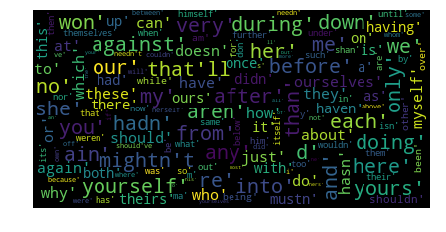

In [43]:
wordcloud  = WordCloud(
    background_color='black',
   # stopwords=stopWords,
    max_words=150,
    max_font_size=20, 
    random_state=42
    ).generate(str(stopWords))#(str(df_dublicates["Review Text"]))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()

In [ ]:
# can include POS and others etc..